In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Gayatri\\Downloads\\Customer Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replace blanks with 0 as tenure is 0 and no total charges are recorded. 

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df["customerID"].duplicated().sum()

0

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [12]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


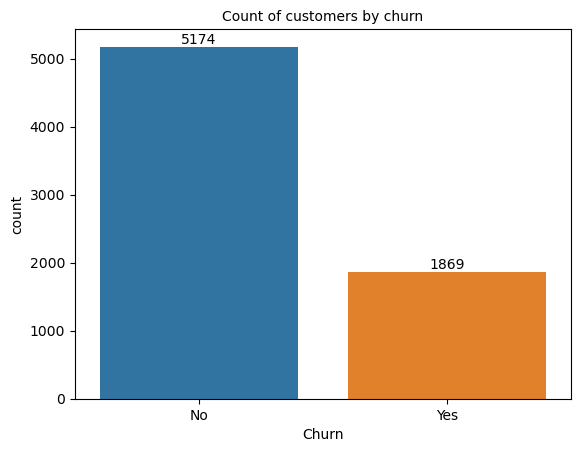

In [13]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn", fontsize = 10)
plt.show()

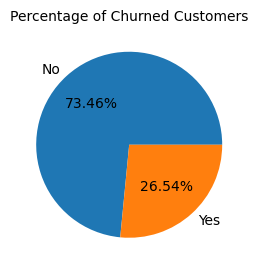

In [14]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

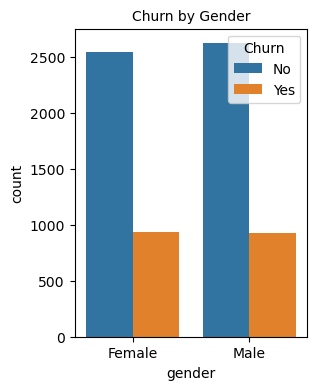

In [15]:
plt.figure(figsize = (3,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender", fontsize = 10)
plt.show()

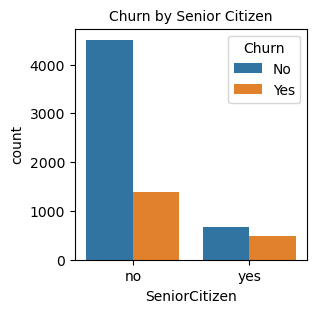

In [16]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by Senior Citizen", fontsize = 10)
plt.show()

NameError: name 'containers' is not defined

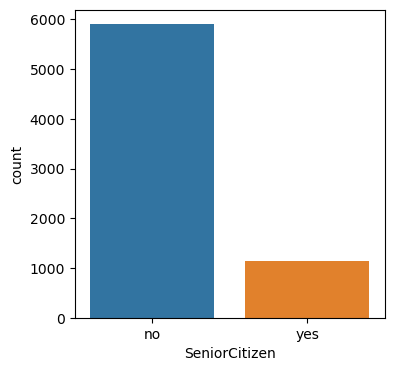

In [21]:
plt.figure(figsize = (4,4))
for container in ax.containers:
    ax.bar_label(container)
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax=containers[0])
plt.title("Count of Customers by Senior citizen")
plt.show()

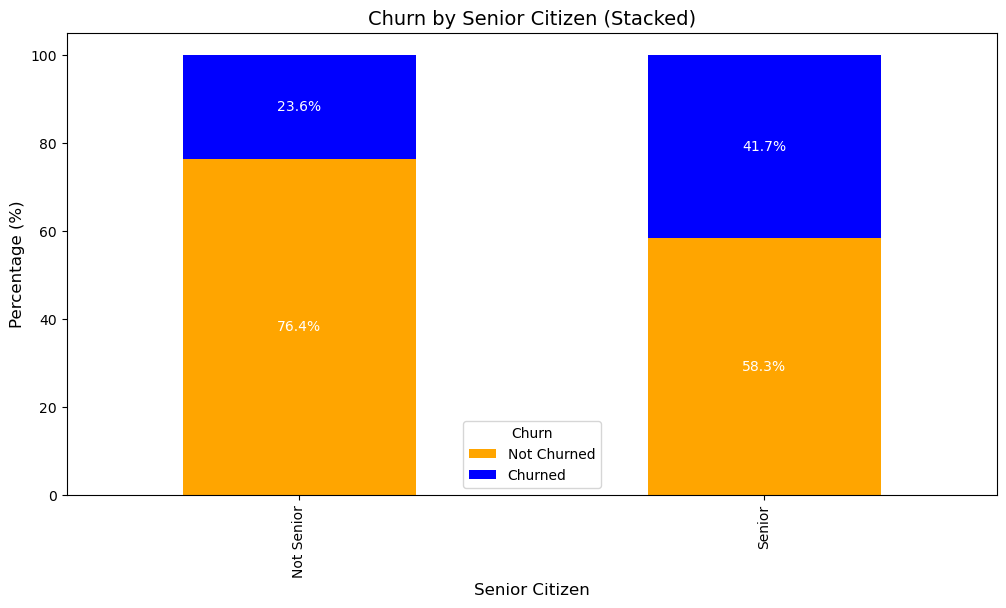

In [25]:
# Assuming 'df' is your DataFrame
# Calculate the percentage of churn by SeniorCitizen status
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
churn_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=['orange', 'blue'])

# Adding labels with percentage
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    # Adding the percentage label
    plt.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
             ha='center', va='center', color='white', fontsize=10)

# Title and labels
plt.title('Churn by Senior Citizen (Stacked)', fontsize=14)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

plt.show()

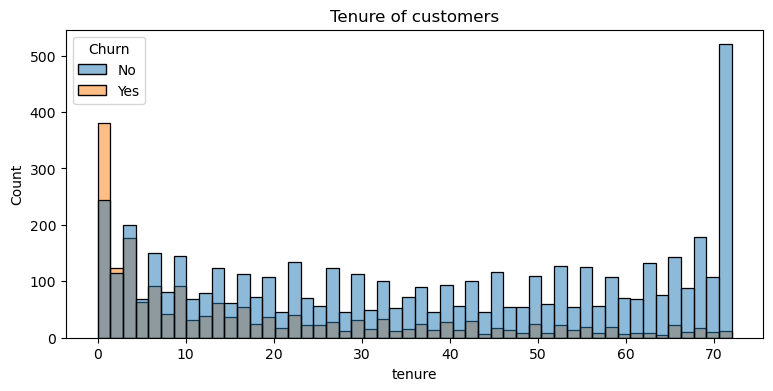

In [30]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 50, hue = "Churn")
plt.title("Tenure of customers")
plt.show()

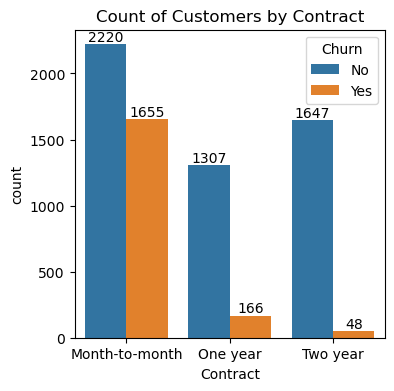

In [41]:
plt.figure(figsize = (4, 4))
ax = sns.countplot(x = 'Contract', data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container) 
plt.title("Count of Customers by Contract")
plt.show()



In [ ]:
# People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [46]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

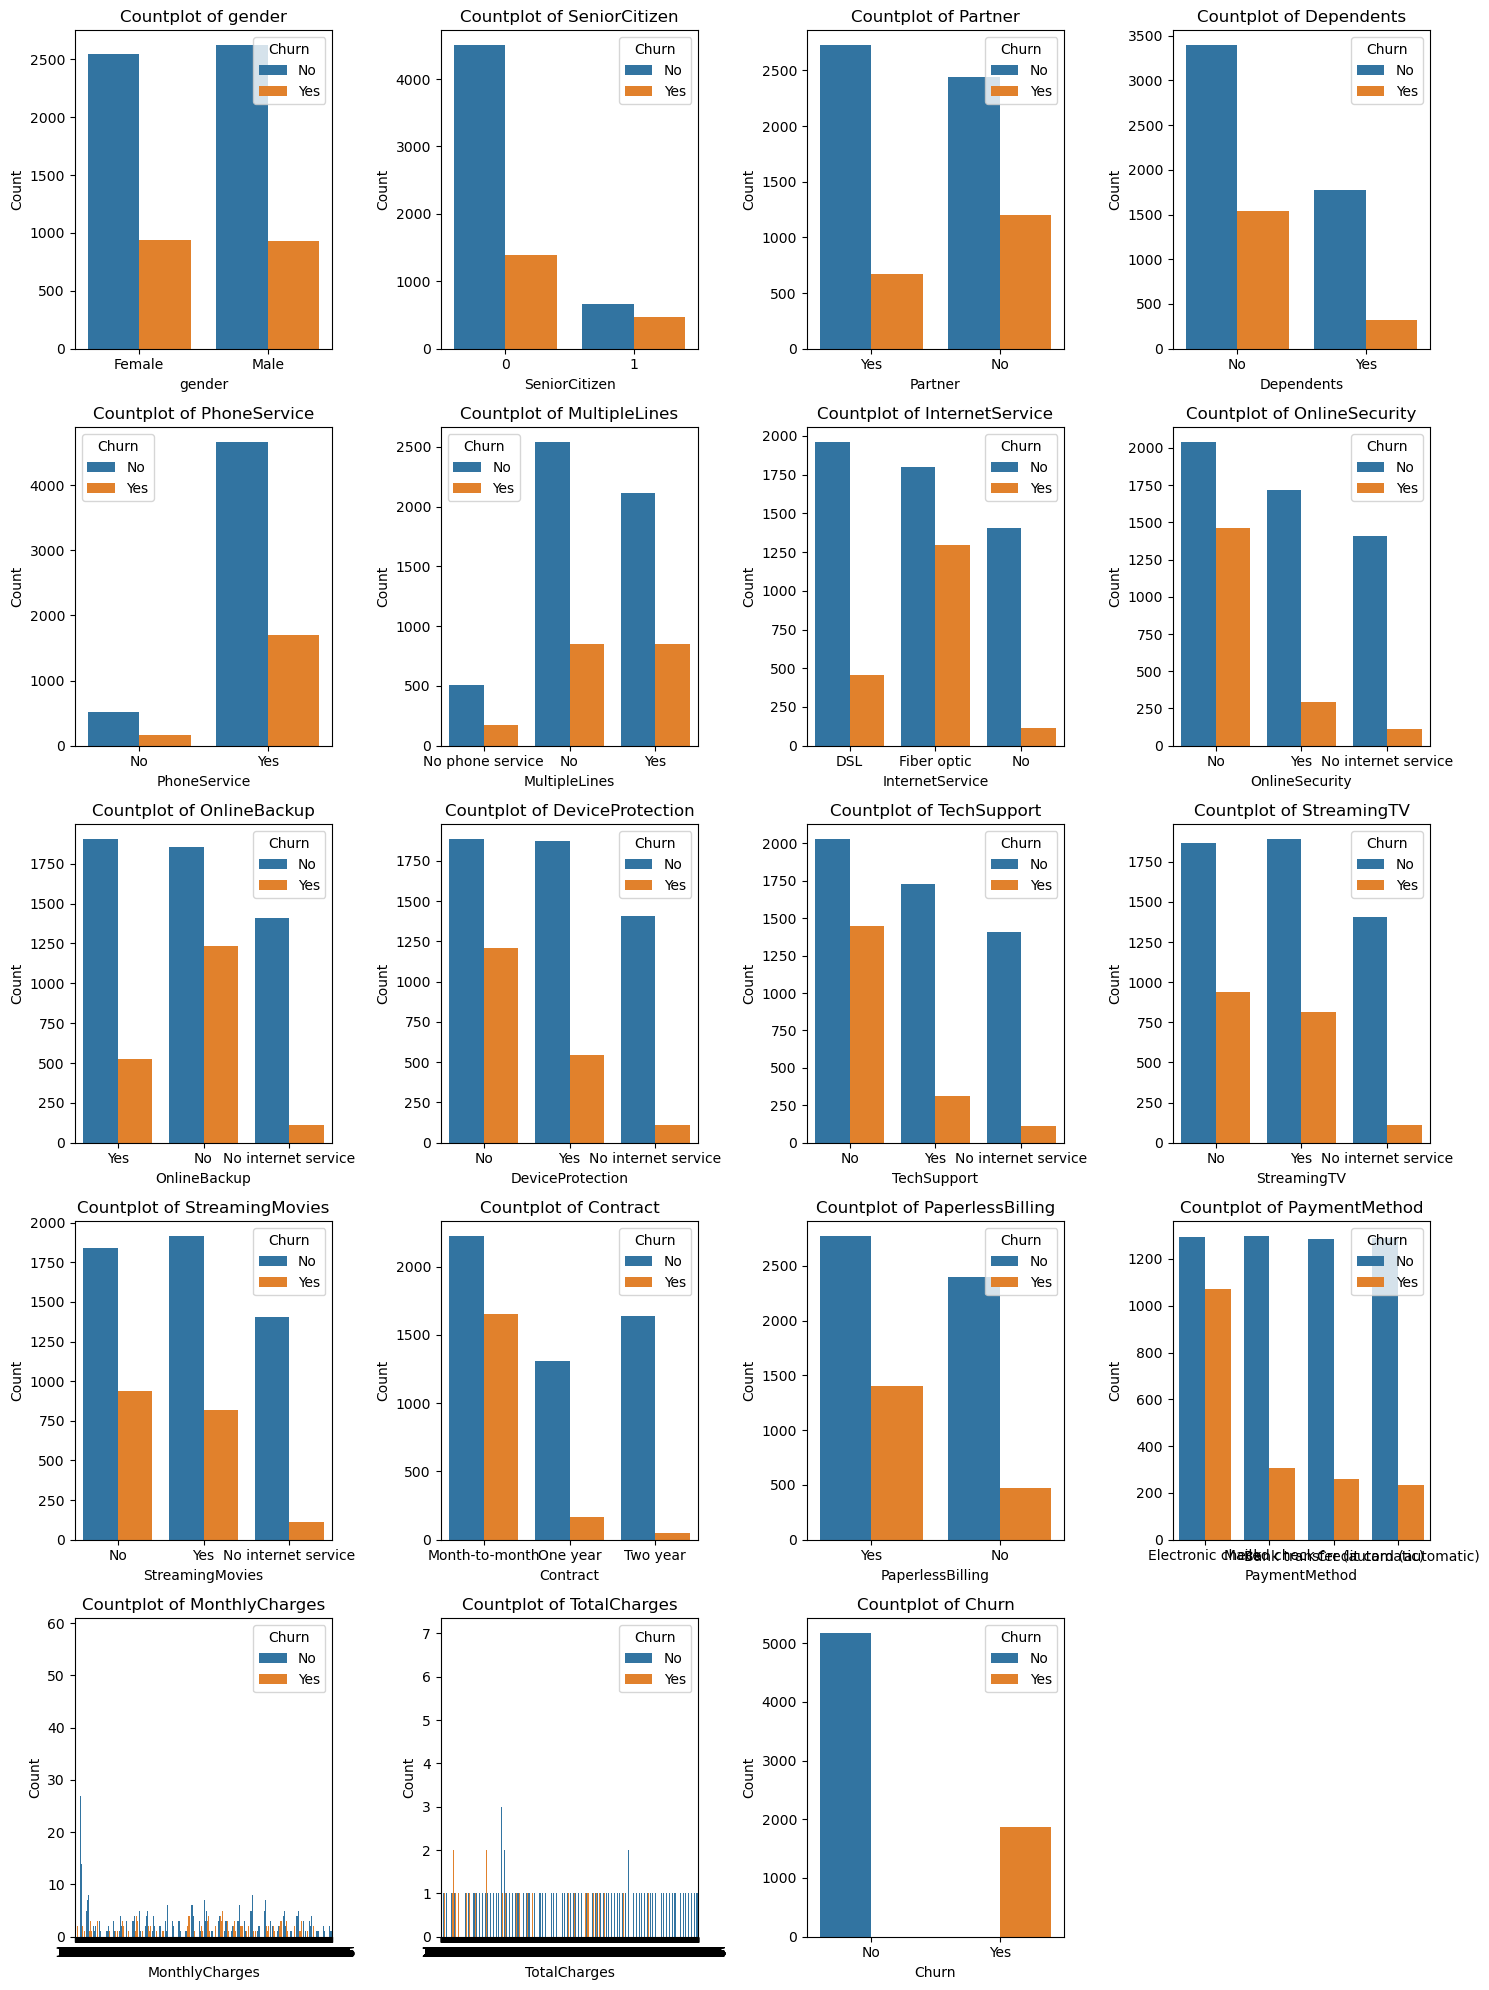

In [3]:
# List of columns to create countplots for
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                   'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
                   'TotalCharges', 'Churn']

# Calculate the number of rows and columns for the subplots
n_cols = 4  # You can adjust the number of columns based on your preference
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate rows based on number of plots

# Create a figure and axes array for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


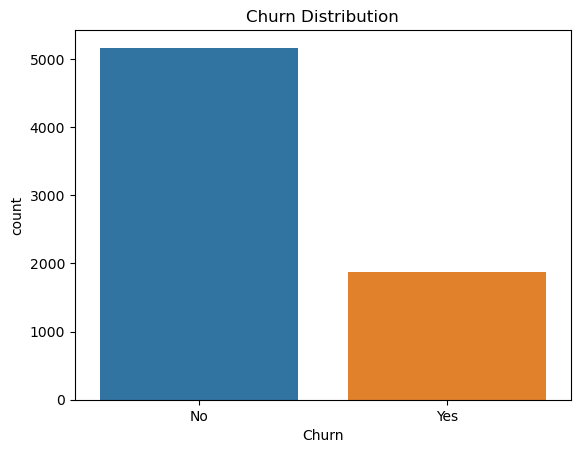

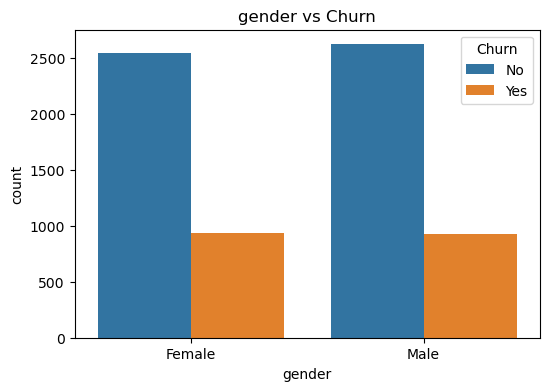

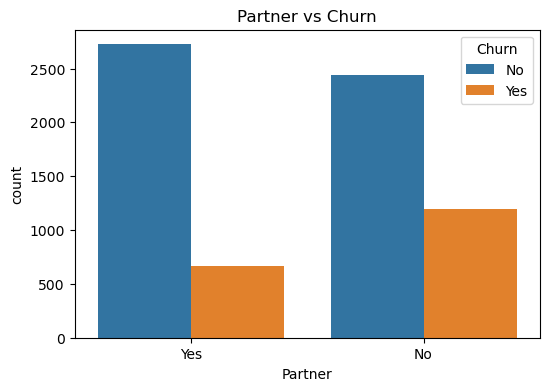

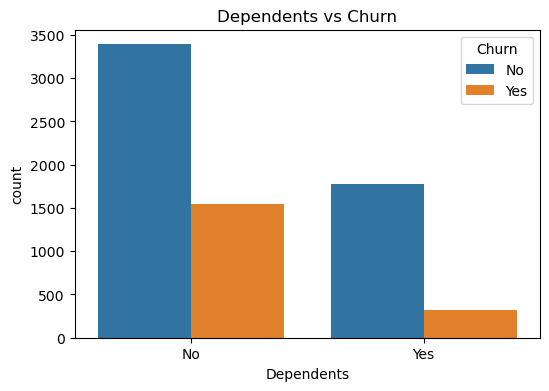

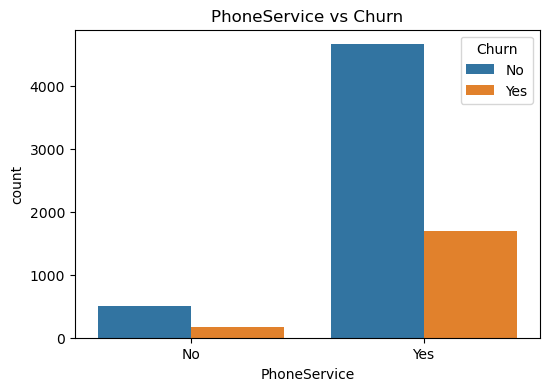

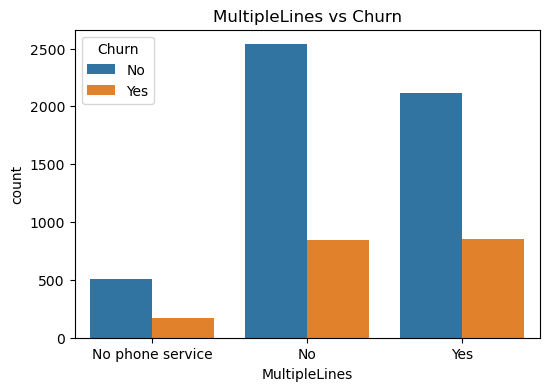

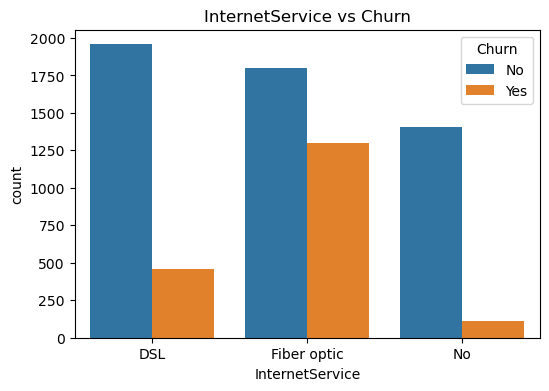

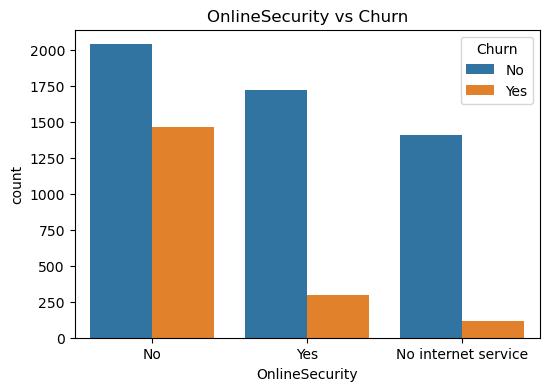

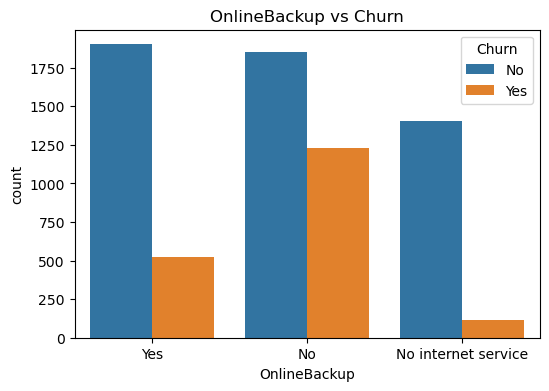

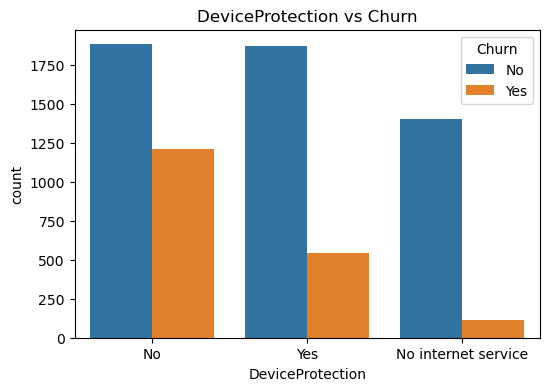

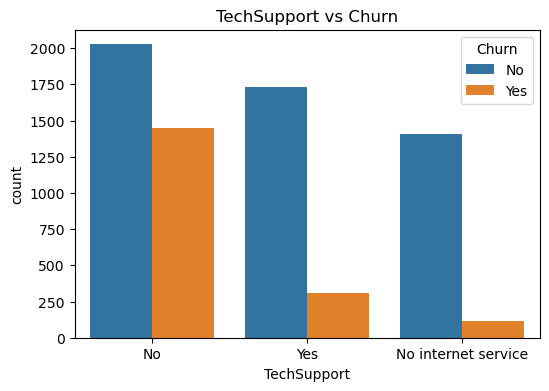

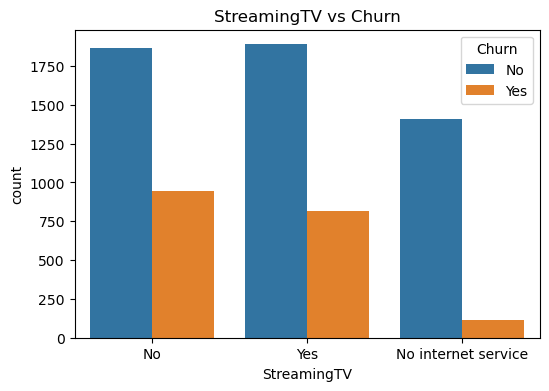

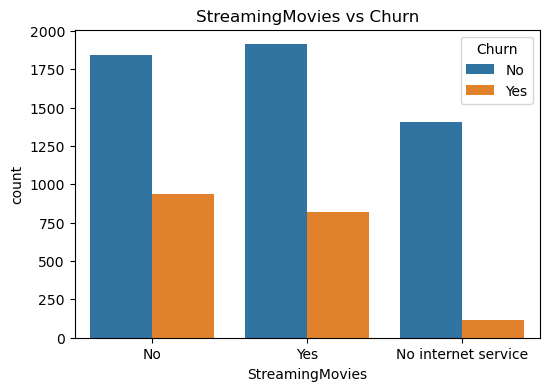

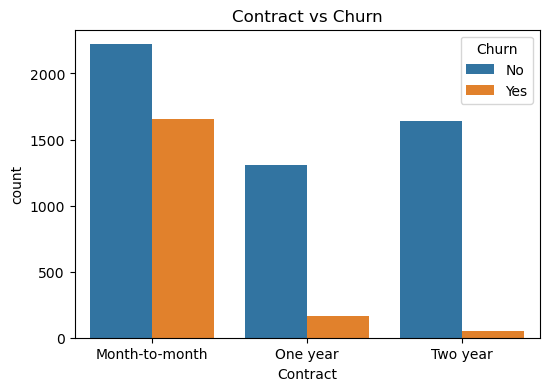

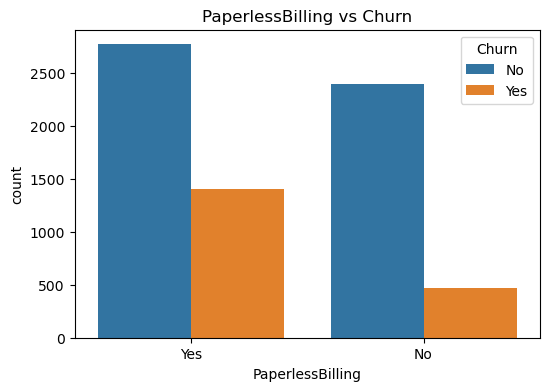

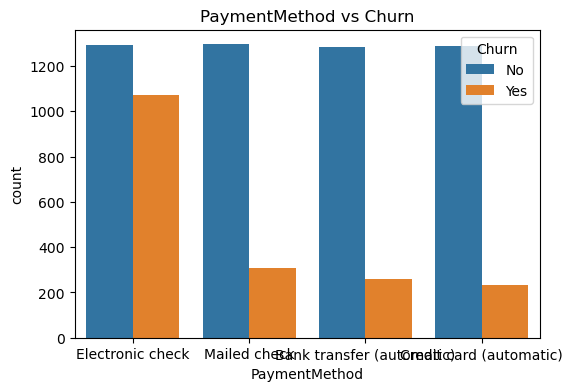

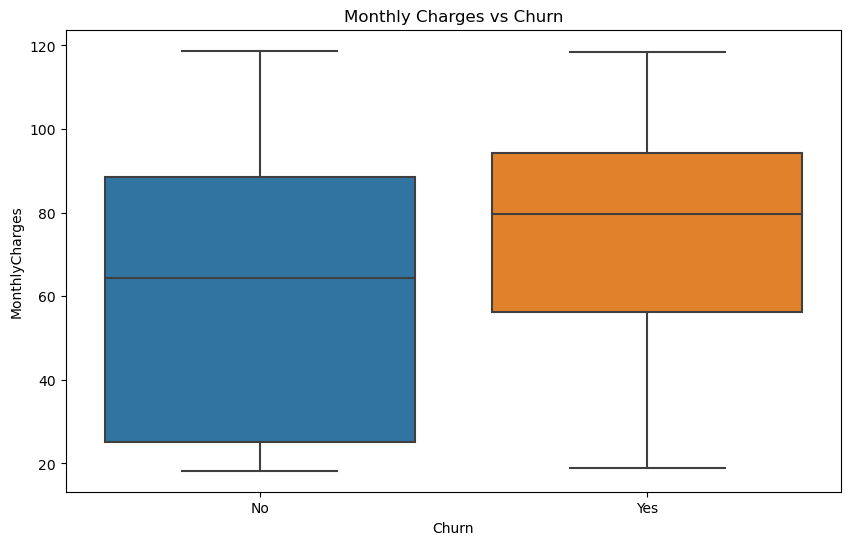

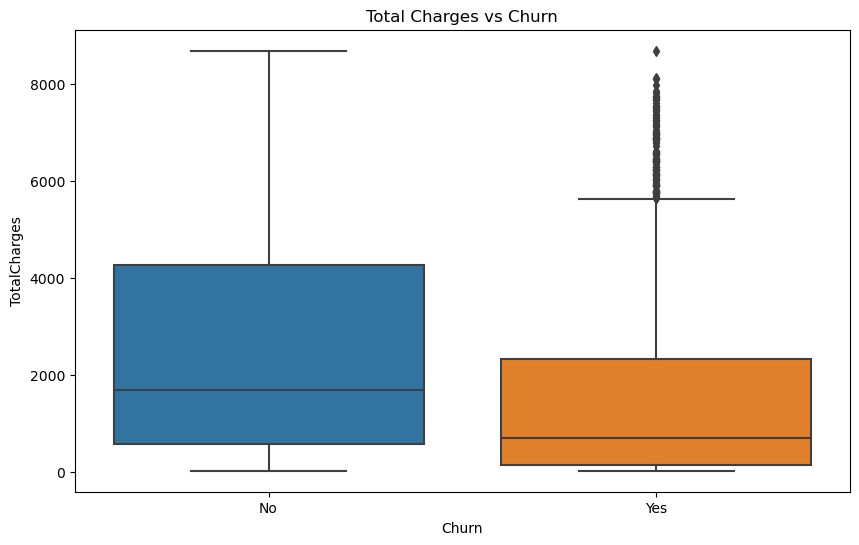

ValueError: could not convert string to float: '7590-VHVEG'

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset (replace 'data.csv' with your actual file name)
df = pd.read_csv('C:\\Users\\Gayatri\\Downloads\\Customer Churn.csv')

# Data Cleaning
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values (if any)
df = df.dropna()  # Optionally fill missing values based on your strategy

# Exploratory Data Analysis
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Relationship between categorical features and churn
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

# Plot categorical features vs churn
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

# MonthlyCharges and TotalCharges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()

# Correlation analysis
# We can check the correlation of numeric features
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model to check feature importance (Random Forest)
# Prepare the data for modeling
df_encoded = pd.get_dummies(df[categorical_columns + ['MonthlyCharges', 'TotalCharges']], drop_first=True)
X = df_encoded
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Churn is 'Yes' or 'No'

# Train a Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


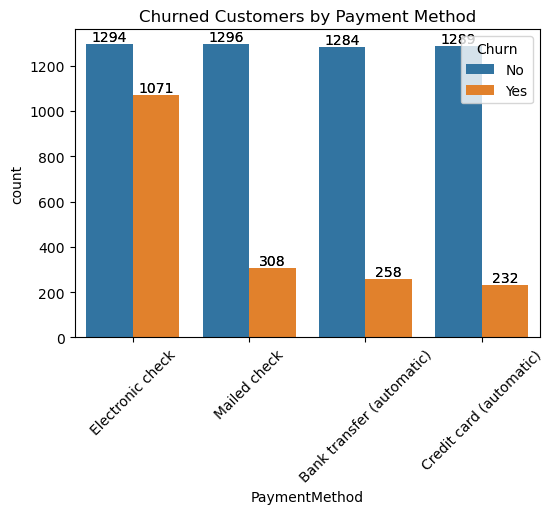

In [9]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(ax.containers[0]) 
    ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()